# Abstract

This project focuses on implementing logistic regression with an emphasis on understanding the underlying optimization techniques. Logistic regression is a fundamental method for binary classification, relying on a linear decision boundary and the sigmoid activation function to model probabilities. The implementation includes the computation of the logistic loss, its gradient, and parameter updates using gradient descent, both with and without the inclusion of momentum. Through a series of experiments, we explore how different learning rates and momentum values affect the convergence behavior of the model. We also explore how the model handles overfitting as well as how applicable the model is to real world data.

# Data Preparation

Source Code: https://raw.githubusercontent.com/Nibsquatch/Nibsquatch.github.io/refs/heads/main/logistic.py

In [1]:
%load_ext autoreload
%autoreload 2
import torch
import matplotlib.pyplot as plt
from logistic import LogisticRegression, GradientDescentOptimizer

# generate random data points
def classification_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    y = 1.0*y
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)
    
    return X, y

X, y = classification_data(noise = 0.5)

# Gradient Descent Experimentation

First lets performa a vanilla gradient descent with pdims = 2, a small α, and 𝛽 = 0. We would expect the loss to decrease monotonically. 

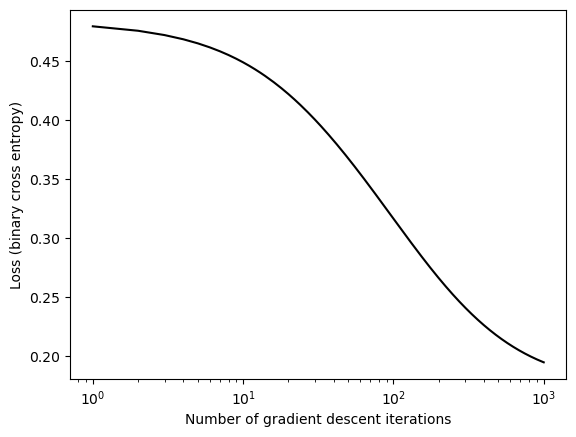

In [ ]:
# instantiate a model and an optimizer
LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)

# for keeping track of loss values
loss_vec = []

# iterate through 1000 gradient descent updates
for _ in range(1000):

    # not part of the update: just for tracking our progress    
    loss = LR.loss(X, y) 
    loss_vec.append(loss)

    # only this line actually changes the parameter value
    opt.step(X, y, alpha = 0.1, Beta = 0)

# plot the loss as a function of the number of gradient descents
plt.plot(torch.arange(1, len(loss_vec)+1), loss_vec, color = "black")
plt.semilogx()
labs = plt.gca().set(xlabel = "Number of gradient descent iterations", ylabel = "Loss (binary cross entropy)")

The implementation appears correct because the loss function decreases monotonically over iterations, which is expected in properly functioning gradient descent for logistic regression. The smooth decline in binary cross-entropy loss indicates that the model is learning effectively without divergence or oscillations. Additionally, the logarithmic x-axis confirms that the loss reduction is well-behaved over multiple orders of magnitude in iterations. These characteristics suggest that the weight updates are correctly applied and that the optimization process is progressing as intended. Now on the same data, implement gradient descent with a 𝛽 = .9 and compare the difference in plots.

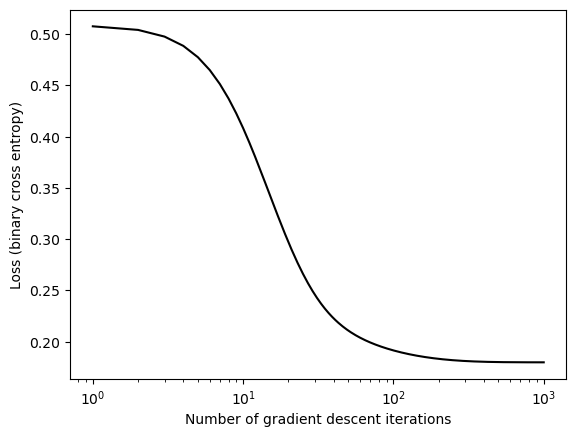

In [ ]:
# instantiate a model and an optimizer
LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)

# for keeping track of loss values
loss_vec = []

# iterate through 1000 gradient descent updates
for _ in range(1000):

    # not part of the update: just for tracking our progress    
    loss = LR.loss(X, y)
    loss_vec.append(loss)

    # only this line actually changes the parameter value
    opt.step(X, y, alpha = 0.1, Beta = .9)

# plot the loss as a function of the # of gradient descent updateds
plt.plot(torch.arange(1, len(loss_vec)+1), loss_vec, color = "black")
plt.semilogx()
labs = plt.gca().set(xlabel = "Number of gradient descent iterations", ylabel = "Loss (binary cross entropy)")

Comparing the gradient descent with momentum (𝛽>0) to the previous vanilla gradient descent (𝛽=0), we observe that the addition of momentum leads to a smoother and faster convergence. The loss decreases more rapidly in the early iterations, demonstrating how momentum helps accelerate learning by reducing oscillations and maintaining directional consistency. In contrast, the previous descent without momentum had a more gradual decline in loss. This confirms that momentum improves optimization efficiency, reaching a lower loss in fewer iterations while maintaining stability. Now, let's explore how the algorithim handles overfitting where pdims > n_points.

In [ ]:
# generate random data points with pdims > n points
def classification_data2(n_points = 150, noise = 0.2, p_dims = 300):
    
    y = torch.arange(n_points) >= int(n_points/2)
    y = 1.0*y
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)
    
    return X, y

# generate a training and test set with pdims > n points
X_train, y_train = classification_data2(noise = 0.5)
X_test, y_test = classification_data2(noise = .5)

# instantiate a model and an optimizer
LR = LogisticRegression()
opt = GradientDescentOptimizer(LR)

# training loop without keeping track of loss since we care more about the predictive accuracy of the model
for _ in range(1000):

    # only this line actually changes the parameter value
    opt.step(X_train, y_train, alpha = 0.1, Beta = .9)

# calculate training accuracy
y_pred = LR.predict(X_train)
acc = (1.0*(y_pred == y_train)).mean().item()

print("The model has a training accuracy of: " + str(acc))

# calculate the testing accuracy
y_pred = LR.predict(X_test)
acc = (1.0*(y_pred == y_test)).mean().item()

print("The model has a testing accuracy of: " + str(acc))

The model has a training accuracy of: 1.0
The model has a testing accuracy of: 0.9399999976158142


This demonstrates that although the testing accuracy is still fairly high, working with data where the number of dimensions is greater than the number entries tends to cause overfitting of the training data as the model fit 100% to the training data

# Logistic Regression on Real World Data

Now, lets perform logistic regression on real world data. The Wine Quality dataset from the UCI Machine Learning Repository consists of two datasets related to red and white Vinho Verde wines from Portugal. These datasets were originally compiled by researchers Paulo Cortez and colleagues at the University of Minho in collaboration with the Viticulture Commission of the Vinho Verde Region (CVRVV). Each dataset contains physicochemical measurements of wine samples—1,599 red wines and 4,898 white wines—alongside sensory quality scores rated by professional tasters. The goal is to model wine quality based on chemical properties, making the data suitable for both regression and classification tasks. The original study describing the dataset is “Modeling wine preferences by data mining from physicochemical properties” by Cortez et al., published in Decision Support Systems (2009). We will converting the wine quality score to high or low, with high quality (1) being scores greater than 5 and low quality (0) being scores less than or equal to 5. Our logistic regression will attempt to classify the wine as high or low quality based on its physiochemical measurements. 

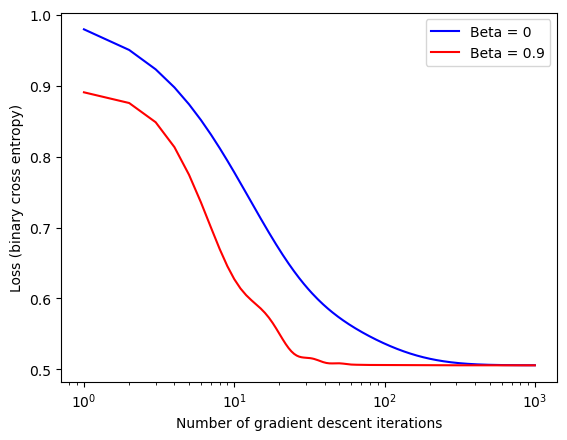

The loss of the model with Beta = 0 is: 0.5396895408630371
The loss of the model with Beta = .9 is: 0.5408527851104736
The accuracy of the model with Beta = 0 is: 0.7169230580329895
The accuracy of the model with Beta = .9 is: 0.7192307710647583


In [ ]:
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
import numpy as np
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features.to_numpy() 
y = wine_quality.data.targets.to_numpy()

# Convert quality scores to binary labels (1 for high, 0 for low)
y = (y > 5).astype(int)  # Vectorized operation

# Split into train (60%), val (20%), test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Convert to torch tensors
X_train = torch.tensor(X_train, dtype = torch.float32)
y_train = torch.tensor(y_train, dtype = torch.float32).squeeze()
X_test = torch.tensor(X_test, dtype = torch.float32)
y_test = torch.tensor(y_test, dtype = torch. float32).squeeze()

# add a 1 to the end of each row
X_train = torch.cat((X_train, torch.ones((X_train.shape[0], 1))), 1)
X_test = torch.cat((X_test, torch.ones((X_test.shape[0], 1))), 1)


# perform a logistic regression on the data
# instantiate a model and an optimizer
LR1 = LogisticRegression()
LR2 = LogisticRegression() 
opt1 = GradientDescentOptimizer(LR1)
opt2 = GradientDescentOptimizer(LR2)

# for keeping track of loss values
loss1_vec = []
loss2_vec = []

# perform 1000 iterations of gradient descent
for _ in range(1000):
    # Track loss values (convert tensors to scalars)
    loss1_vec.append(LR1.loss(X_train, y_train))
    loss2_vec.append(LR2.loss(X_train, y_train))

    # Perform optimization step
    opt1.step(X_train, y_train, alpha = 0.1, Beta = 0)
    opt2.step(X_train, y_train, alpha = 0.1, Beta = 0.9)

# Plot loss over iterations
plt.plot(range(1, len(loss1_vec) + 1), loss1_vec, color = "blue", label = "Beta = 0")
plt.plot(range(1, len(loss2_vec) + 1), loss2_vec, color = "red", label = "Beta = 0.9")
plt.semilogx()
plt.xlabel("Number of gradient descent iterations")
plt.ylabel("Loss (binary cross entropy)")
plt.legend()
plt.show()

# Compute the Loss and Accuracy of the Model Against the Test Set
print("The loss of the model with Beta = 0 is: " + str(LR1.loss(X_test, y_test).item()))
print("The loss of the model with Beta = .9 is: " + str(LR2.loss(X_test, y_test).item()))

# calculate the models accuracies
y_pred1 = LR1.predict(X_test)
y_pred2 = LR2.predict(X_test)

acc1 = (1.0*(y_pred1 == y_test)).mean()
acc2 = (1.0*(y_pred2 == y_test)).mean()

print("The accuracy of the model with Beta = 0 is: " + str(acc1.item()))
print("The accuracy of the model with Beta = .9 is: " + str(acc2.item()))

The model with Beta = .9 as opposed to Beta = 0 (standard logistic regression) demonstrates almost identical loss to the Beta = 0 model but converges to its final loss much quicker; however, the loss, even after convergence remains extremely high which is not ideal for prediction. The accuracy of the two models are almost identical but both seem to be better than simply guessing at predicting the wine quality; however, the predictive accuracy could be better if the loss could be reduced. 

# Dicussion

This project demonstrated the implementation of logistic regression from scratch, focusing on how different optimization techniques impact model performance. By manually coding the sigmoid function, logistic loss, and gradient descent (with and without momentum), the underlying process of empirical risk minimization was explored in detail. Experiments with synthetic datasets showed that the algorithm behaves as expected, with momentum significantly improving convergence speed, particularly in the early stages of training. However, when working with high-dimensional data, it was observed that logistic regression can overfit, achieving perfect training accuracy but failing to generalize well to new data. In applying the model to real-world wine quality data, it became evident that, despite faster convergence with momentum, the models still struggled with high loss values. This highlighted the importance of further tuning and potentially exploring more complex models to improve predictive accuracy. Overall, this project emphasized the crucial balance between optimization and generalization in machine learning.